In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import nomenclature

In [2]:
countries_json = gpd.read_file('world_natural-earth.geojson')

<Axes: >

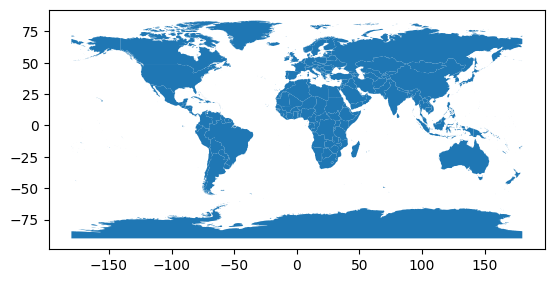

In [3]:
countries_json.plot()

In [4]:
definitions = nomenclature.DataStructureDefinition("common-definitions/definitions")

region_lists = {
    "R5": [],
    "R9": [],
    "R10": []
}

for hierarchy in region_lists.keys():
    for r in definitions.region.filter(hierarchy=hierarchy):
        region_name = definitions.region[r].name
        countries = definitions.region[r].countries
        
        
        if not countries:
            continue
        
        
        region_lists[hierarchy].append({
            'name': region_name,
            'countries': countries
        })

r5_region_list = region_lists["R5"]
r9_region_list = region_lists["R9"]
r10_region_list = region_lists["R10"]

In [5]:
def filterAndMerge(regionslist,final_gpd):
    for region in regionslist:
        temp_region= countries_json[countries_json['I_REGION'].isin(region['countries'])]
        temp_region= temp_region.unary_union
        temp_gpd = gpd.GeoDataFrame({
            'I_REGION': [region['name']],
            'geometry': [temp_region]
        }, crs=countries_json.crs)
  

        ax = temp_gpd.plot()
        ax.set_title(region['name'])
        plt.show()  
        final_gpd = pd.concat([final_gpd,temp_gpd])
    return final_gpd

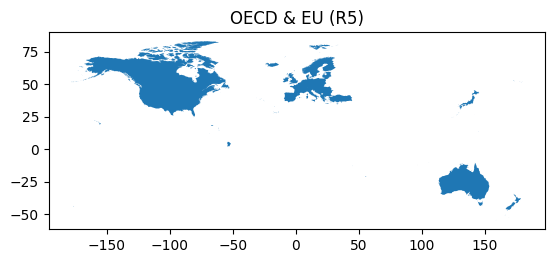

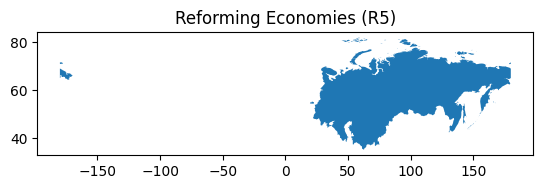

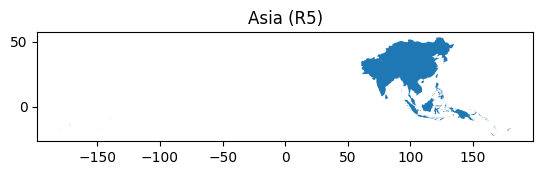

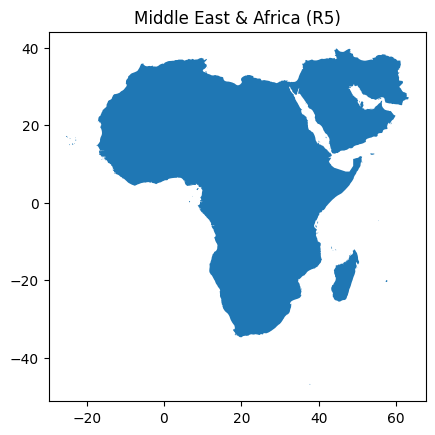

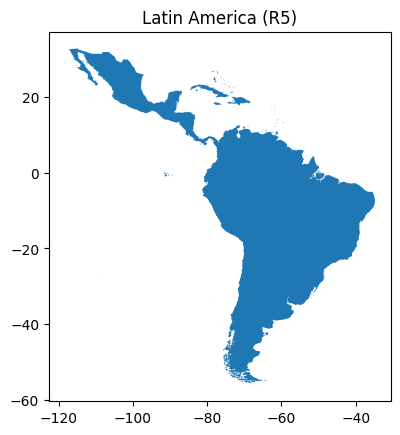

In [6]:
r5_regions = gpd.GeoDataFrame(columns=['I_REGION','geometry'] ,crs=countries_json.crs)
r5_regions=filterAndMerge(r5_region_list,r5_regions)

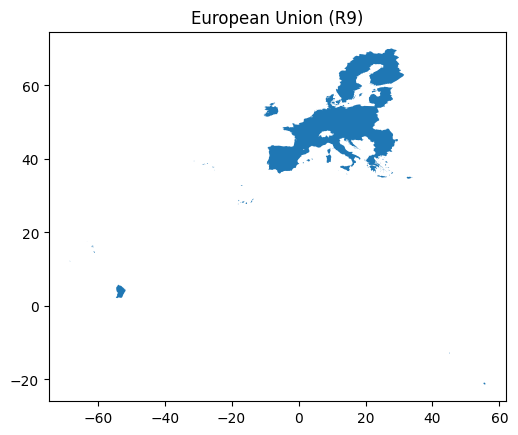

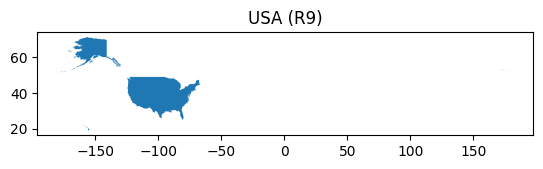

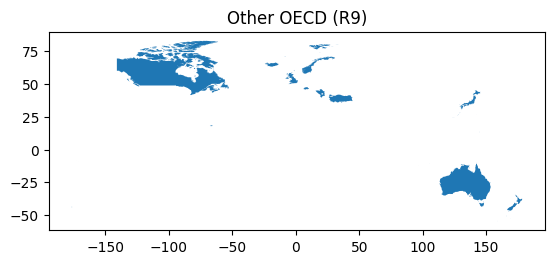

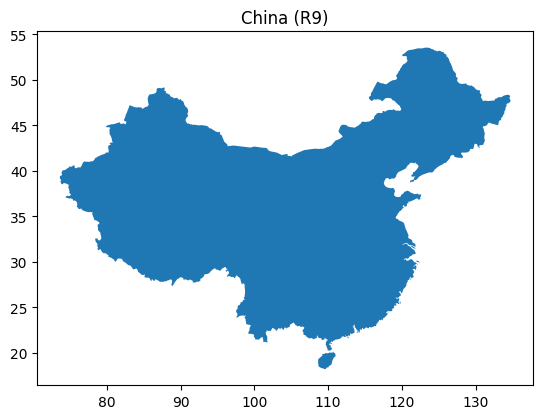

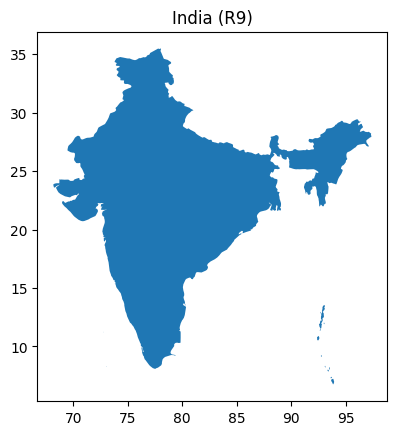

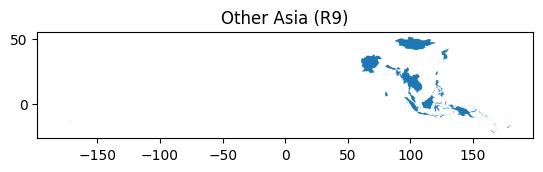

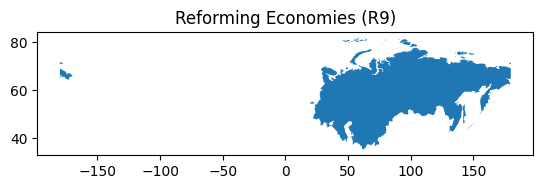

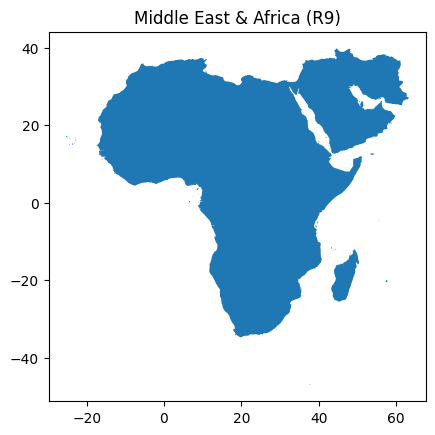

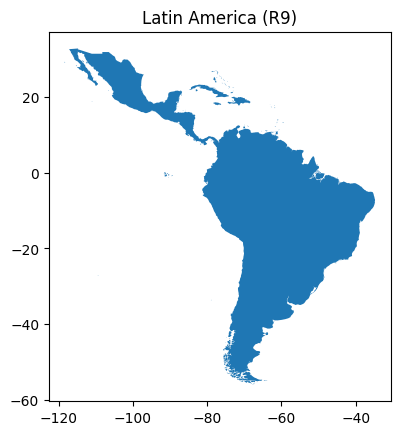

In [7]:
r9_regions = gpd.GeoDataFrame(columns=['I_REGION','geometry'] ,crs=countries_json.crs)
r9_regions=filterAndMerge(r9_region_list,r9_regions)

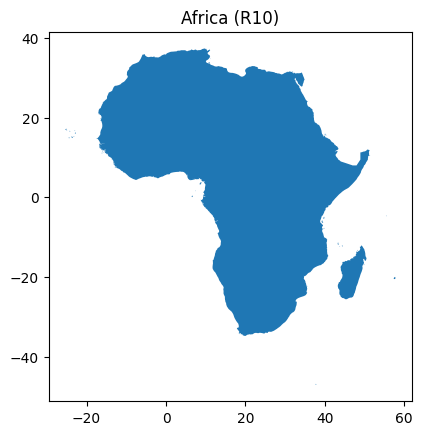

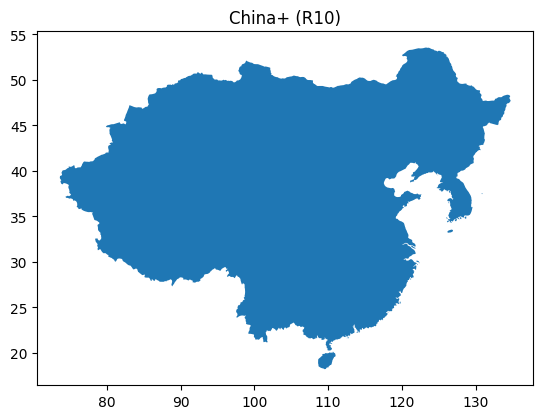

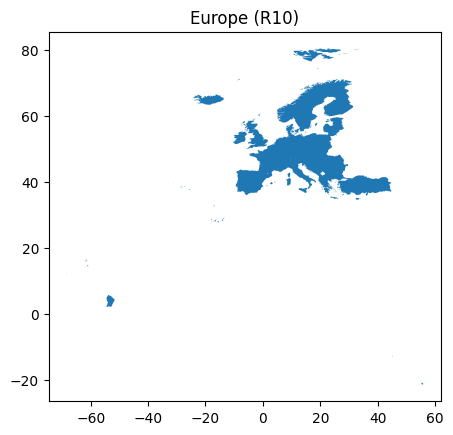

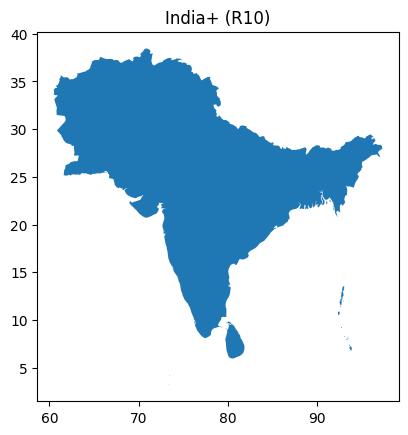

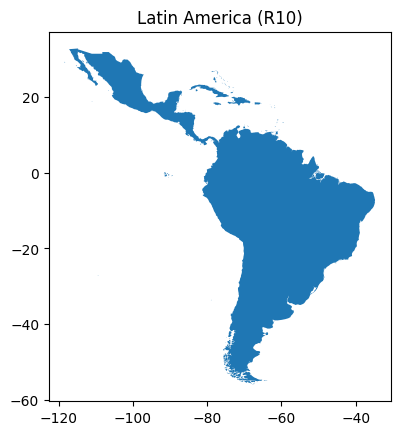

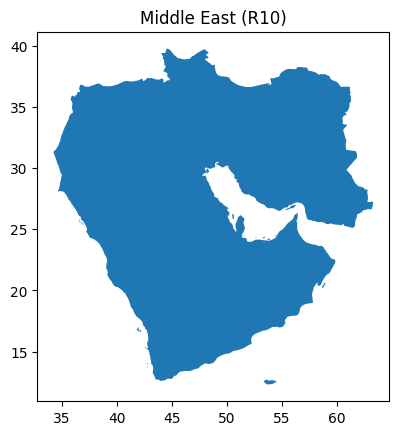

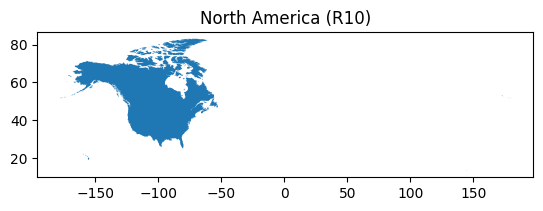

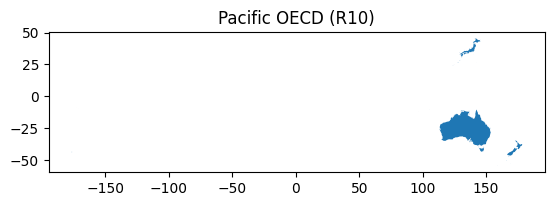

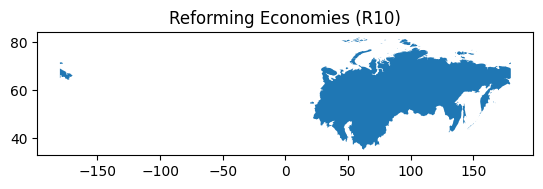

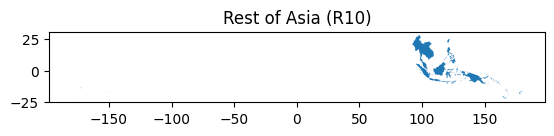

In [8]:
r10_regions = gpd.GeoDataFrame(columns=['I_REGION','geometry'] ,crs=countries_json.crs)
r10_regions=filterAndMerge(r10_region_list,r10_regions)

In [9]:
r5_regions.to_file('r5_regions.geojson', driver="GeoJSON")  
r9_regions.to_file('r9_regions.geojson', driver="GeoJSON")  
r10_regions.to_file('r10_regions.geojson', driver="GeoJSON")  